In [17]:
#Import Library
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


In [18]:
#mengimport  data dalam bentuk csv
dfkp = pd.read_csv('KuisionerPenelitian.csv',sep=',',engine='python')
dfkp.head()

,Umur,Jenis Kelamin,Pendidikan Terakhir,Pekerjaan,Jenis Yogurt Bark Fruity sering anda dibeli,Berapa tingkat Kepuasan Anda terhadap produk Yogurt Bark Fruity,Yogurt Bark Fruity rasa apa yang anda sukai?
0,18,1,4,1,1,4,1
1,22,2,5,2,1,4,1
2,13,1,3,1,1,4,1
3,44,1,3,1,1,4,1
4,20,1,3,1,1,4,1


In [19]:
#mengecek data
dfkp.describe()

,Umur,Jenis Kelamin,Pendidikan Terakhir,Pekerjaan,Jenis Yogurt Bark Fruity sering anda dibeli,Berapa tingkat Kepuasan Anda terhadap produk Yogurt Bark Fruity,Yogurt Bark Fruity rasa apa yang anda sukai?
count,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000
mean,39.670330,1.329670,3.428571,1.527473,1.219780,4.164835,1.175824
std,21.599411,0.472698,0.634960,1.204996,0.416392,0.763962,0.382780
min,10.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000
25%,21.500000,1.000000,3.000000,1.000000,1.000000,4.000000,1.000000
50%,33.000000,1.000000,3.000000,1.000000,1.000000,4.000000,1.000000
75%,56.000000,2.000000,4.000000,1.000000,1.000000,5.000000,1.000000
max,89.000000,2.000000,6.000000,5.000000,2.000000,5.000000,2.000000


In [20]:
#Mengecek semua column apakah masih ada data yang bernilai NULL dan mengecek tipe data
dfkp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 7 columns):
 #   Column                                                           Non-Null Count  Dtype
---  ------                                                           --------------  -----
 0   Umur                                                             91 non-null     int64
 1   Jenis Kelamin                                                    91 non-null     int64
 2   Pendidikan Terakhir                                              91 non-null     int64
 3   Pekerjaan                                                        91 non-null     int64
 4   Jenis Yogurt Bark Fruity sering anda dibeli                      91 non-null     int64
 5   Berapa tingkat Kepuasan Anda terhadap produk Yogurt Bark Fruity  91 non-null     int64
 6   Yogurt Bark Fruity rasa apa yang anda sukai?                     91 non-null     int64
dtypes: int64(7)
memory usage: 5.1 KB


In [21]:
#untuk menambahkan semua kolom
X = dfkp.iloc[:, :]
X

,Umur,Jenis Kelamin,Pendidikan Terakhir,Pekerjaan,Jenis Yogurt Bark Fruity sering anda dibeli,Berapa tingkat Kepuasan Anda terhadap produk Yogurt Bark Fruity,Yogurt Bark Fruity rasa apa yang anda sukai?
0,18,1,4,1,1,4,1
1,22,2,5,2,1,4,1
2,13,1,3,1,1,4,1
3,44,1,3,1,1,4,1
4,20,1,3,1,1,4,1
...,...,...,...,...,...,...,...
86,21,1,3,1,1,4,1
87,20,1,3,1,1,4,1
88,25,1,4,1,1,5,1
89,19,1,4,1,1,4,1


In [35]:
#Perhitungan Standarisasi(rata-rata)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
df = pd.DataFrame(X_scaled, columns=X.columns)
print(df)

        Umur  Jenis Kelamin  Pendidikan Terakhir  Pekerjaan  \
0  -1.008842      -0.701287             0.904930  -0.440163   
1  -0.822626       1.425950             2.488556   0.394313   
2  -1.241612      -0.701287            -0.678697  -0.440163   
3   0.201564      -0.701287            -0.678697  -0.440163   
4  -0.915734      -0.701287            -0.678697  -0.440163   
..       ...            ...                  ...        ...   
86 -0.869180      -0.701287            -0.678697  -0.440163   
87 -0.915734      -0.701287            -0.678697  -0.440163   
88 -0.682963      -0.701287             0.904930  -0.440163   
89 -0.962288      -0.701287             0.904930  -0.440163   
90 -1.008842       1.425950            -0.678697  -0.440163   

    Jenis Yogurt Bark Fruity sering anda dibeli  \
0                                     -0.530745   
1                                     -0.530745   
2                                     -0.530745   
3                                     -

In [36]:
#Clustering K-means
from sklearn.cluster import KMeans
kmean = KMeans(n_clusters=2)
kmean.fit(dfkp)

KMeans(n_clusters=2)

In [32]:
#hasil terbaik perhitungan clustering
#Menentukan centroid
centers = kmean.cluster_centers_
labels = kmean.labels_

#menambahkan hasil labels kedalam DataFrame 
dfkp ['Hasil'] = labels

# Mencetak pusat cluster
print("Pusat Cluster:")
print(centers)

# Mencetak label
print("Label:")
print(labels)


Pusat Cluster:
[[66.63333333  1.4         3.5         1.9         1.16666667  4.26666667
   1.13333333]
 [26.40983607  1.29508197  3.39344262  1.3442623   1.24590164  4.1147541
   1.19672131]]
Label:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 1 0 0 1 0 1 1 0 1 0 0 0 0 0 1 1 1 1 1 1 0 0 1 0 0 0 1 1 0 0 1
 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [34]:
#Hasil dari perhitungan clustering
print(dfkp)

    Umur  Jenis Kelamin  Pendidikan Terakhir  Pekerjaan  \
0     18              1                    4          1   
1     22              2                    5          2   
2     13              1                    3          1   
3     44              1                    3          1   
4     20              1                    3          1   
..   ...            ...                  ...        ...   
86    21              1                    3          1   
87    20              1                    3          1   
88    25              1                    4          1   
89    19              1                    4          1   
90    18              2                    3          1   

    Jenis Yogurt Bark Fruity sering anda dibeli  \
0                                             1   
1                                             1   
2                                             1   
3                                             1   
4                                   

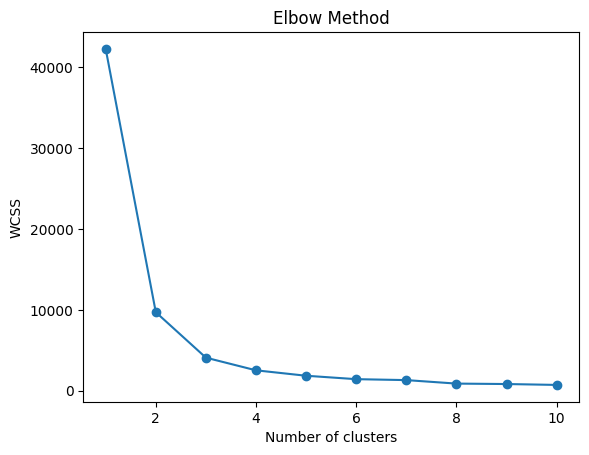

In [26]:
#Pengujian clustering menggunakan metode elbow
# Inisialisasi list untuk menyimpan nilai inersia (interasi) dari setiap jumlah cluster
inertia = []

# Jumlah cluster yang ingin diuji
# Anda bisa menyesuaikan rentang ini sesuai kebutuhan
num_clusters = range(1, 11)  

# Melakukan iterasi untuk setiap jumlah cluster dan menghitung inersia
for k in num_clusters:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plotting elbow method
plt.plot(num_clusters, inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

In [37]:
#Pengujian clustering terbaik
from sklearn.metrics import davies_bouldin_score
# Menghitung Davies-Bouldin Index
db_index = davies_bouldin_score(X, kmeans.labels_)
print("Davies-Bouldin Index:", db_index)

Davies-Bouldin Index: 0.7302514202434198
